In [32]:
from google.colab import drive

In [33]:
import pandas as pd
import re
import numpy as np

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.layers import LSTM,Dense,Embedding,Dropout
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [36]:
import matplotlib.pyplot as plt

In [37]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [38]:
dataframe = pd.read_csv("/content/drive/MyDrive/train.csv")
dataframe.head()

,Title,Author,Category,Pengalaman Pribadi,Kesehatan Mental,Profesi,Percintaan,Mistis
0,Reflections as a Senior: My Favorite Moments,Mayoma Jolayemi '23,Pengalaman Pribadi,1,0,0,0,0
1,The Transformative Power of a Bachelor’s Degree,Clive Walker,Pengalaman Pribadi,1,0,0,0,0
2,Managing stress in College Academics,Vivek Rajak,"Pengalaman Pribadi, Kesehatan Mental",1,1,0,0,0
3,My college experience,Laurent Etienne,Pengalaman Pribadi,1,0,0,0,0
4,Pengalaman Memulai Jualan Pisang,"Masim ""Vavai"" Sugianto",Pengalaman Pribadi,1,0,0,0,0


In [39]:
dataframe.shape

(110, 8)

In [40]:
dataframe.Title = dataframe.Title.astype('string')
dataframe.dtypes

Title                 string
Author                object
Category              object
Pengalaman Pribadi     int64
Kesehatan Mental       int64
Profesi                int64
Percintaan             int64
Mistis                 int64
dtype: object

In [41]:
dataframe.isnull().sum()

Title                 0
Author                0
Category              0
Pengalaman Pribadi    0
Kesehatan Mental      0
Profesi               0
Percintaan            0
Mistis                0
dtype: int64

In [42]:
Article = dataframe.Title.values
y_fields = ['Pengalaman Pribadi',	'Kesehatan Mental',	'Profesi'	,'Percintaan',	'Mistis']
y = dataframe[y_fields].values

In [43]:
test_x = pd.read_csv('/content/drive/MyDrive/test.csv')
test_y = pd.read_csv('/content/drive/MyDrive/test_labels.csv')

In [44]:
x_test = test_x['Title'].values
y_test = test_y[y_fields].values

In [45]:
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(Article)

# Tokenization of x_test
tokenizer.fit_on_texts(x_test)

In [46]:
sent_length = 110
voc_size = 18000
input_dim = 10

In [47]:
seq = tokenizer.texts_to_sequences(Article)
pad = sequence.pad_sequences(seq, maxlen=110)

test_seq = tokenizer.texts_to_sequences(x_test)
test_pad = sequence.pad_sequences(test_seq, maxlen=110)

In [48]:
model = Sequential()
model.add(Embedding(voc_size, input_dim, input_length=sent_length))
model.add(LSTM(128, return_sequences=True)) 
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 110, 10)           180000    
                                                                 
 lstm_2 (LSTM)               (None, 110, 128)          71168     
                                                                 
 lstm_3 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 5)                 645       
                                                                 
Total params: 399,909
Trainable params: 399,909
Non-tr

In [50]:
len(pad), y.shape , len(test_pad), y_test.shape

(110, (110, 5), 110, (110, 5))

In [51]:
x_train = np.array(pad)
y_train = np.array(y) 

x_test = np.array(test_pad)
y_test = np.array(y_test)

In [52]:
x_train.shape , y_train.shape , x_test.shape, y_test.shape

((110, 110), (110, 5), (110, 110), (110, 5))

In [53]:
history=model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=100, batch_size=64)

Epoch 1/100
2/2 [==============================] - 12s 3s/step - loss: 0.6912 - accuracy: 0.3818 - val_loss: 0.6839 - val_accuracy: 0.4455
Epoch 2/100
2/2 [==============================] - 2s 1s/step - loss: 0.6803 - accuracy: 0.4545 - val_loss: 0.6611 - val_accuracy: 0.4455
Epoch 3/100
2/2 [==============================] - 2s 1s/step - loss: 0.6505 - accuracy: 0.4455 - val_loss: 0.5882 - val_accuracy: 0.4455
Epoch 4/100
2/2 [==============================] - 1s 882ms/step - loss: 0.5625 - accuracy: 0.4455 - val_loss: 0.5114 - val_accuracy: 0.4455
Epoch 5/100
2/2 [==============================] - 2s 1s/step - loss: 0.5206 - accuracy: 0.4455 - val_loss: 0.5183 - val_accuracy: 0.4455
Epoch 6/100
2/2 [==============================] - 2s 1s/step - loss: 0.5259 - accuracy: 0.4455 - val_loss: 0.5041 - val_accuracy: 0.4455
Epoch 7/100
2/2 [==============================] - 4s 2s/step - loss: 0.5054 - accuracy: 0.4364 - val_loss: 0.4963 - val_accuracy: 0.4455
Epoch 8/100
2/2 [=============

In [54]:
model.evaluate(x_test, y_test, batch_size=64, verbose=2)

2/2 - 0s - loss: 0.0284 - accuracy: 0.9545 - 373ms/epoch - 187ms/step


[0.02841942571103573, 0.9545454382896423]

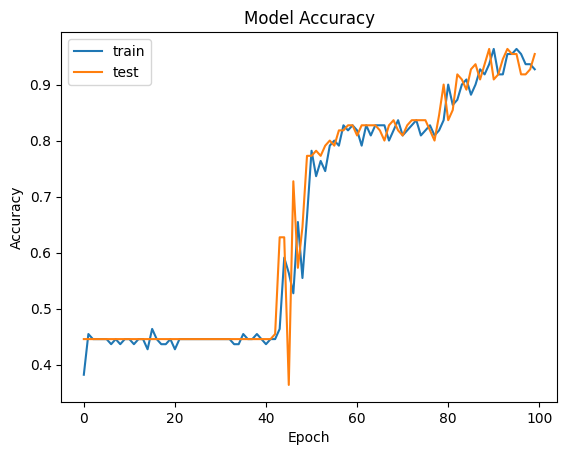

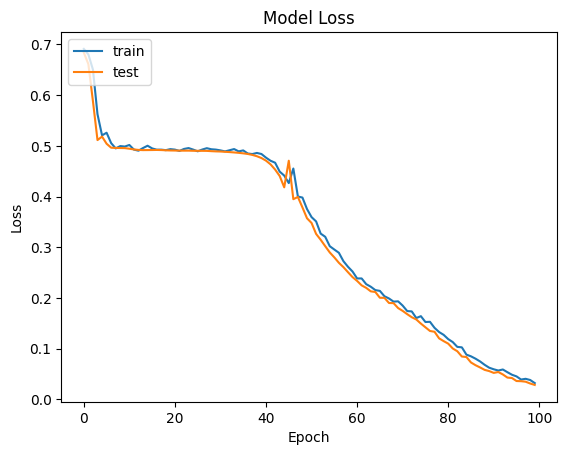

In [55]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [56]:
model.save('STORYVERSE.h5')

In [57]:
from keras.models import load_model

# To load the model
model = keras.models.load_model('STORYVERSE.h5')

In [58]:
import json
from tensorflow.keras.models import model_from_json

# Convert the model to JSON format
model_json = model.to_json()

# Save the JSON model to a file
with open('/content/drive/MyDrive/STORYVERSE.json', 'w') as json_file:
    json_file.write(model_json)

print("Model saved in JSON format.")

Model saved in JSON format.


In [59]:
import shutil

# Specify the source file path
source_file_path = "/content/STORYVERSE.h5"

# Specify the destination file path
destination_file_path = "/content/drive/MyDrive/STORYVERSE.h5"

# Copy the file to the destination
shutil.copyfile(source_file_path, destination_file_path)

print("H5 file downloaded successfully.")


H5 file downloaded successfully.


In [60]:
# Melakukan pemfilteran dan penghapusan nilai-nilai null pada dataframe
category = dataframe["Title"] != ""
dataframe = dataframe[category]
dataframe = dataframe.dropna()

# Memilih indeks pada dataset untuk menampilkan hasil
index = 52

# Mengambil informasi judul pada indeks 
title = dataframe["Title"].iloc[index]

# Mengubah judul menjadi input yang sesuai dengan tokenizer
title_sequence = tokenizer.texts_to_sequences([title])
title_sequence = sequence.pad_sequences(title_sequence, maxlen=110)

# Melakukan prediksi menggunakan model yang telah dilatih
prediction = model.predict(title_sequence)

# Menentukan kategori dengan nilai probabilitas tertinggi 
kategori_tertinggi = np.argsort(prediction)[0][-2:]
kategori = [y_fields[k] for k in kategori_tertinggi]

# Menampilkan hasil
print("Judul:", title)
print("Kategori:", kategori)

1/1 [==============================] - 1s 1s/step
Judul: Pengalaman Saya Selama Menjadi UX Designer Intern di Blibli.com
Kategori: ['Profesi', 'Pengalaman Pribadi']


# Rekomendasi judul untuk satu kategori

In [61]:
# Membuat fungsi untuk merekomendasikan judul berdasarkan kategori-kategori menggunakan model pelatihan
def recommend_titles(categories):
    # Mengambil judul-judul dengan kategori-kategori yang diberikan
    category_titles = dataframe[dataframe[categories].all(axis=1)]['Title']
    
    # Mengubah judul-judul menjadi input yang sesuai dengan tokenizer
    title_sequences = tokenizer.texts_to_sequences(category_titles)
    title_sequences = sequence.pad_sequences(title_sequences, maxlen=110)
    
    # Melakukan prediksi menggunakan model yang telah dilatih
    predictions = model.predict(title_sequences)
    
    # Menampilkan judul-judul yang memiliki semua kategori yang diberikan
    for i in range(len(category_titles)):
        title = category_titles.iloc[i]
        print(title)

# Contoh penggunaan: merekomendasikan judul-judul berdasarkan kategori
recommend_titles(["Profesi"])

1/1 [==============================] - 0s 103ms/step
Menjadi Programmer dalam 6 Bulan (Pengalaman Pribadi)
Mengapa Saya Meninggalkan Go-Jek, Unicorn Start up Indonesia
Bagaimana Memulai Startup di Indonesia?
Pentingnya Profesionalisme di Industri Start Up
Designer *katanya
Menjalankan Bisnis Ala Introvert
Goodbye, Data Analyst
Pengalaman Kerja: 3 Tahun Sebagai Programmer
Pengalaman Jadi Content Writer, Seru Gak Sih?
Berapa Gaji Yoel?
Pengalaman Saya Selama Menjadi UX Designer Intern di Blibli.com
How to Find Confidence in Your Career Path
How to Become an Employee Benefits Professional
The Secrets of a Successful Internship
Pengalaman Kerja Sebagai Programmer di Salah Satu Klien Glints Batam
Pengalaman pindah haluan karir menjadi UX Designer atau Product Designer
Mengatur Ritme Pekerjaan
Menjadi Penulis Mobile


# Rekomendasi judul untuk Lebih dari 2 Category

In [62]:
# Membuat fungsi untuk merekomendasikan judul berdasarkan kategori-kategori menggunakan model pelatihan
def recommend_titles(categories):
    # Mengambil judul-judul dengan kategori-kategori yang diberikan
    category_titles = dataframe[dataframe[categories].any(axis=1)]['Title']
    
    # Mengubah judul-judul menjadi input yang sesuai dengan tokenizer
    title_sequences = tokenizer.texts_to_sequences(category_titles)
    title_sequences = sequence.pad_sequences(title_sequences, maxlen=110)
    
    # Melakukan prediksi menggunakan model yang telah dilatih
    predictions = model.predict(title_sequences)
    
    # Menampilkan judul-judul yang memiliki salah satu atau kedua kategori yang diberikan
    for i in range(len(category_titles)):
        title = category_titles.iloc[i]
        print(title)
recommend_titles(["Pengalaman Pribadi", "Profesi"])

2/2 [==============================] - 0s 148ms/step
Reflections as a Senior: My Favorite Moments
The Transformative Power of a Bachelor’s Degree
Managing stress in College Academics
My college experience
Pengalaman Memulai Jualan Pisang
Things I regret when I was in college
How I Finally Figured Out What To Major In During College
How College Students Can Use ChatGPT to 10x Productivity
Menjadi Programmer dalam 6 Bulan (Pengalaman Pribadi)
Other People’s Perceptions of Me Trigger Negative Thoughts
My Medication Throughout Treatment Changed
Eating Disorder Treatments that Didn't Work for Me
Mengapa Saya Meninggalkan Go-Jek, Unicorn Start up Indonesia
Bagaimana Memulai Startup di Indonesia?
Bertransaksi Online Menggunakan Kartu Kredit Indonesia Sangatlah Aman
Pentingnya Profesionalisme di Industri Start Up
Designer *katanya
Menjalankan Bisnis Ala Introvert
Skripsi Adalah Seni
Goodbye, Data Analyst
Pengalaman Kerja: 3 Tahun Sebagai Programmer
Pengalaman Jadi Content Writer, Seru Gak Sih?